In [1]:
# Sim Wang DSCI 510 Final Project
# If you are failing to run the code below, you might not have followed the guidelines in the README
# YOU MUST CREATE A CONDA ENVIRONMENT IN YOUR TERMINAL BEFORE YOU RUN ANYTHING IN THIS NOTEBOOK!!

import sys
import os

# Dynamically add the 'src' directory to the Python path
sys.path.append(os.path.join(os.getcwd(), 'src'))
!pip install -r requirements.txt

In [2]:
# First Part of Analysis: Visualization
# Workflow: Scraping the HTML table of List video game considered the best, following each game publisher's hyperlink,
# scrape each publisher's HQ country, append it into the table, clean the table, return a CSV file, then conduct visualizations

# The function below produce the cleaned CSV file with publisher HQ country
from get_table_HQ import get_best_games_table

get_best_games_table()

Scraping HQ addresses: 100%|██████████████████| 337/337 [00:29<00:00, 11.37it/s]

Saved 337 rows to best_video_games.csv


/Users/sherry/Desktop/DSCI510_Final_Project-main/src/visualization.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='pastel')


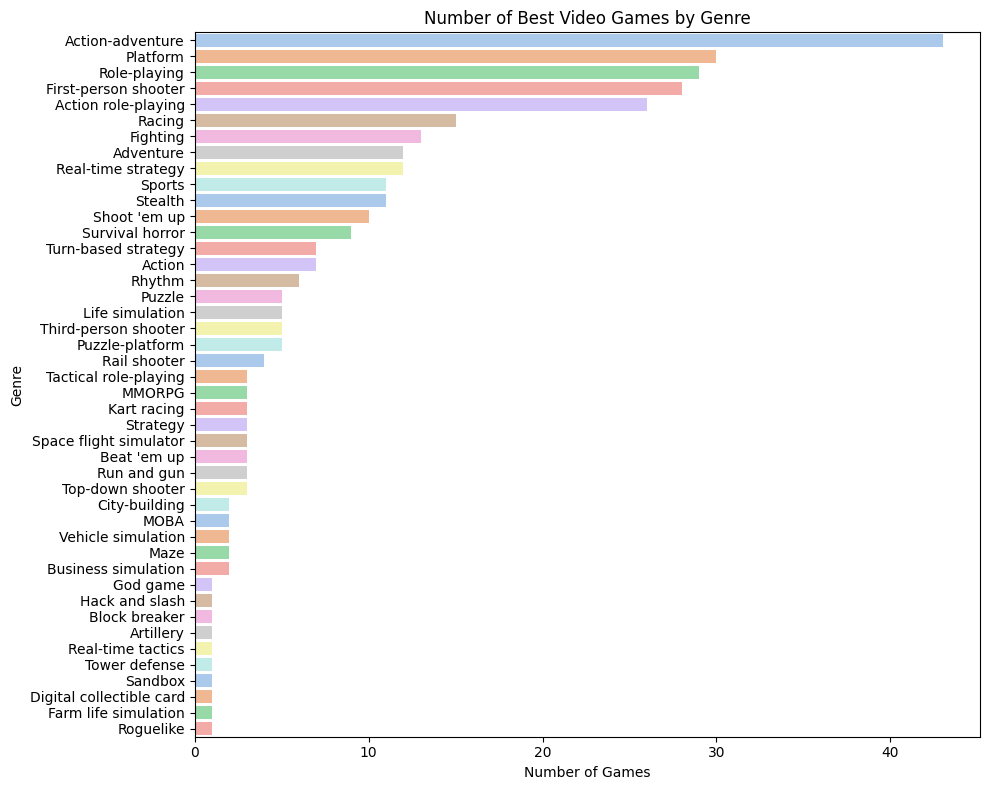

In [3]:
from visualization import plot_games_by_genre
plot_games_by_genre()

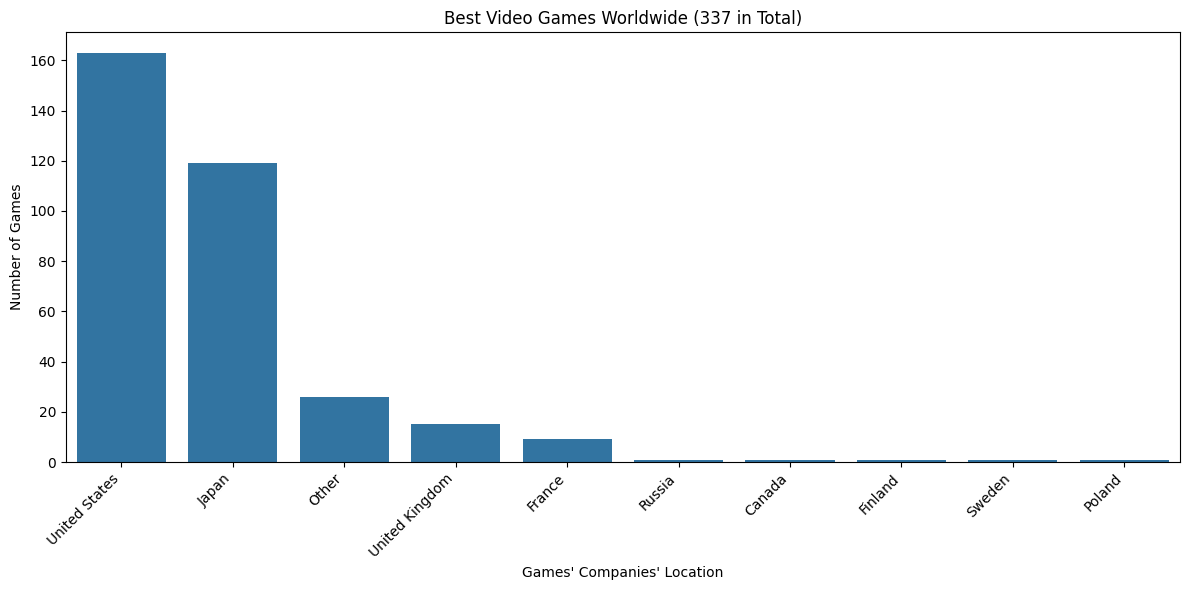

In [4]:
from visualization import count_games_by_country
count_games_by_country()

/Users/sherry/Desktop/DSCI510_Final_Project-main/src/visualization.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=games_per_period.index, y=games_per_period.values, palette='pastel')


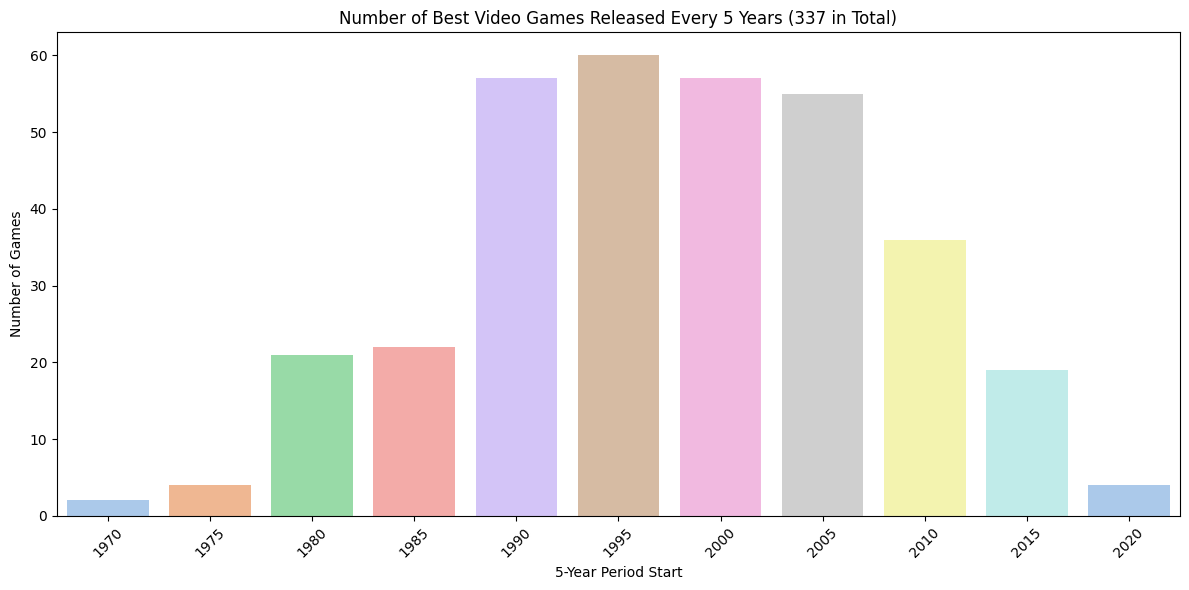

In [5]:
from visualization import plot_games_by_5year_period
plot_games_by_5year_period()

/Users/sherry/Desktop/DSCI510_Final_Project-main/src/visualization.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Count', data=platform_df, palette='pastel')


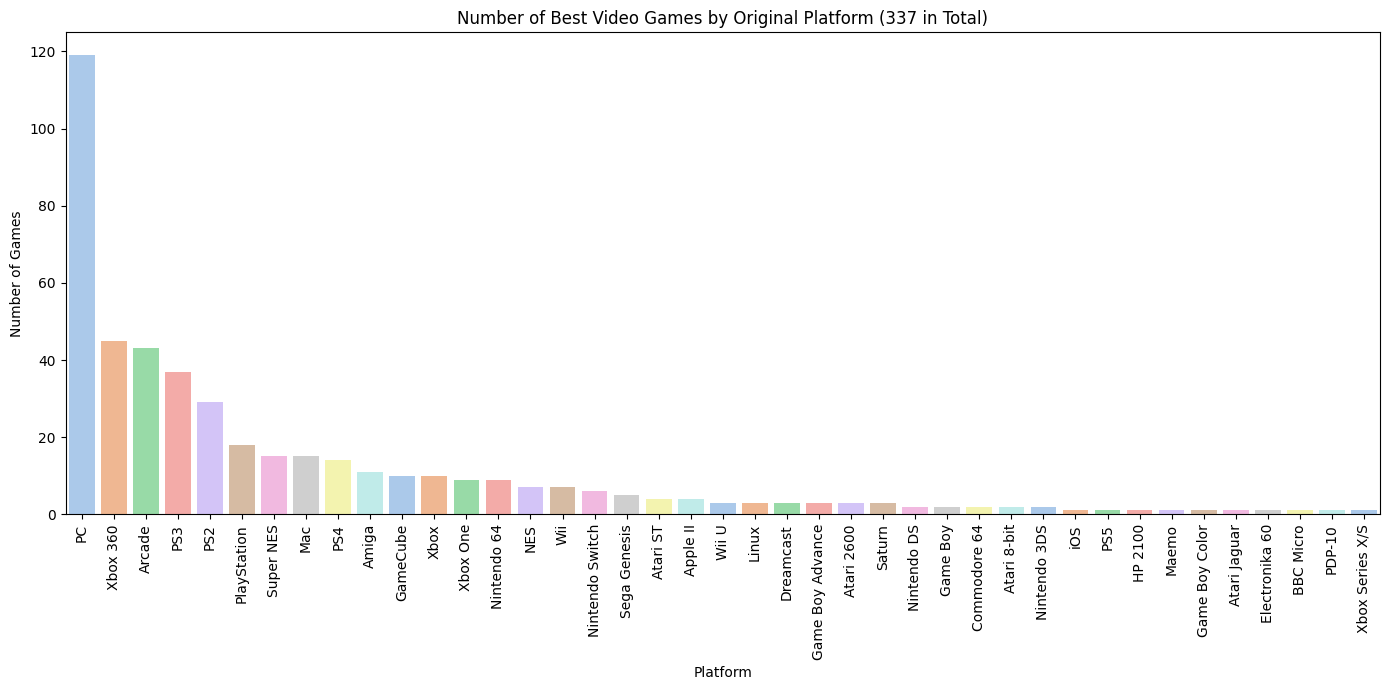

In [6]:
from visualization import plot_games_by_platform
plot_games_by_platform()

In [7]:
# Now we have completed all visualization steps
# Let's start building the Retrieval-Augmented Generation chatbot!
# The first step is to extract the Wikipedia text descriptions of all 337 games (around 290k words)

from hyperlink_scraper import extract_game_links_and_genres, save_to_txt
games = extract_game_links_and_genres(limit=337)
save_to_txt(games, output_file="game.txt")

Scraping games: 100%|███████████████████████| 337/337 [00:48<00:00,  6.98game/s]


In [ ]:
# Now we have the game.txt, lets split it into chunks(700 words each chunk, with 100 words overlap with each other),
# extract keywords/tags of each chunk, store them in local sqlite database, embed them into vectors, store vectors in FAISS index file
# YOU MUST HAVE YOUR OWN VALID OPENAI API KEY IN config.py TO RUN THIS!

In [8]:
from rag import (
    detect_file_type,
    extract_text,
    split_text_into_chunks,
    generate_chinese_tags,
    create_db,
    file_to_db,
    load_all_from_db,
    build_faiss_index,
    load_vector_storage,
    search_similar_chunks,
    answer_question_with_prompt
)

/opt/miniconda3/envs/rag_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [10]:
# Since this function uses KeyBERT, it may take around 30 minutes to complete
# It reads the game.txt file, splits the content into chunks, and extracts keywords/tags using KeyBERT
# Although KeyBERT is relatively slow, it supports multiple languages and provides the most accurate results

file_to_db('game.txt')

Processing file: game.txt
Text split into 19009 chunks


Saving to DB: 100%|███████████████████| 19009/19009 [00:00<00:00, 707254.66it/s]

Mission Complete! Data has been inserted with 19009 chunks


In [11]:
# Now we can begin to embed all contents in our database into vectors, and store them in FAISS index file
# This will take around 2 minutes to complete
docs = load_all_from_db()
build_faiss_index(docs)

Building document list: 100%|█████████| 19009/19009 [00:00<00:00, 363676.49it/s]


Vectorizing contents...
Vector index has been saved to vector_index


In [2]:
# After we created the vector index file, we are ready to begin interact with the RAG chatbot
# This project used Streamlit UI, 
# it allows user to input any text questinons aksing about anything related to 337 games in the HTML table

# !!!BY RUNNING THIS BLOCK, IT WILL TAKE YOU TO A NEW WEBPAGE!!!
# At the new webpage, you can interact with chatbot using Streamlit UI interface :)
# If you are not sure what kind of question you want to ask, please reference the best_video_games.csv created by codes before

import subprocess
import os

subprocess.run(
    "echo '' | streamlit run src/app.py",
    shell = True
)

#!!! If this block doesn’t work for you !!!###
# (1) Open your terminal
# (2) Move to the src folder where app.py located at
# (3) Enter: streamlit run app.py
# Then it should be working!


# This is the end of my DSCI 510 Final Project
# Thank you very much for testing my codes!
# Sim Wang DSCI 510


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.203:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            


/Users/sherry/Desktop/DSCI510_Final_Project-main/src/rag.py:123: LangChainDeprecationWarning: Importing FAISS from langchain.vectorstores is deprecated. Please replace deprecated imports:

>> from langchain.vectorstores import FAISS

with new imports of:

>> from langchain_community.vectorstores import FAISS
You can use the langchain cli to **automatically** upgrade many imports. Please see documentation here <https://python.langchain.com/docs/versions/v0_2/>
  from langchain.vectorstores import FAISS


  Stopping...


KeyboardInterrupt: 